In [88]:
### Note: The client need to accept the model . if he is asking a particular model then you have to go with that model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:/Users/Ali/Downloads/concrete_data.csv')
df.head(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [63]:
df.rename(columns={'blast_furnace_slag':'slag','fly_ash':'ash','coarse_aggregate':'coarseagg','fine_aggregate ':'fineagg',
                   'concrete_compressive_strength':'strength'}, inplace=True)
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### 1. From below viz we are able to see that there is hetro-scadacity in the Data . As the below plots are not exactly showing any patterns . So, it is non-homogenious Data.

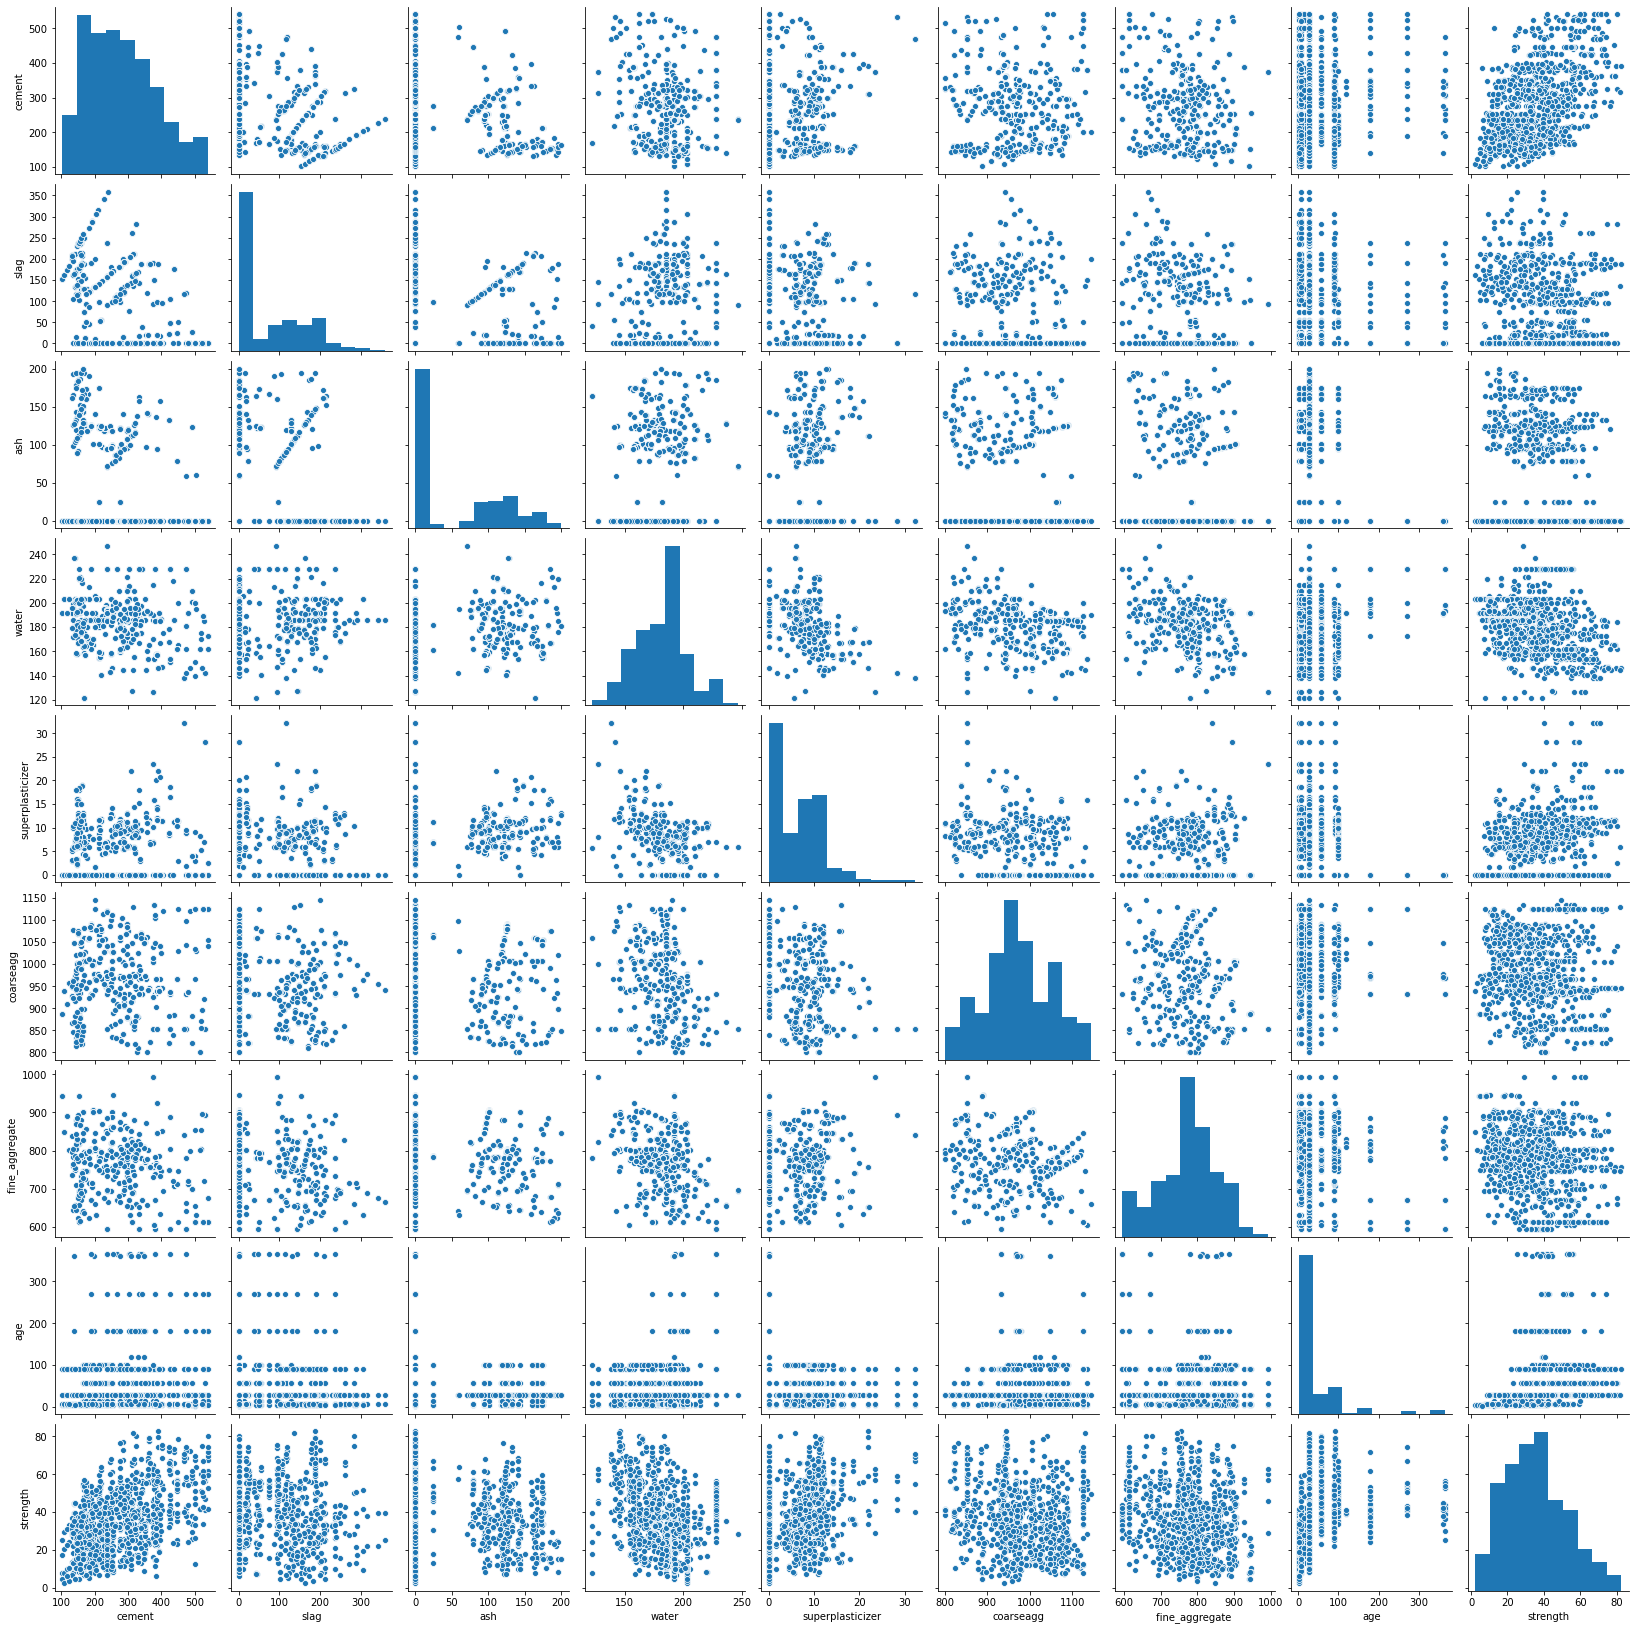

In [5]:
import seaborn as sns
sns.pairplot(df)

In [4]:
d = df.corr()

#### 2. So now here we are able to see that there is very low correlation between features . Ranging from (very week - Moderate) . It may not a good fit for linear regression.

In [5]:
d

,cement,slag,ash,water,superplasticizer,coarseagg,fine_aggregate,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### So now here 1.Cement 2.Water 3.coarseagg 4.fingg even 5.Strenth have high-multi-collinearity

In [65]:
###checking multi-collinearity
#We are able to notice 4 columns with High Multi-collinearity, so we are dropping those columns for better accuracy
import numpy as np
X = np.array(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)
X = pd.DataFrame(X)

[26.232324818614554, 4.442518089309979, 4.560002417136254, 92.50405550361941, 5.519535300205159, 85.89663020690534, 73.51499498282989, 2.4349424482213955, 14.557838329742737]


In [64]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

## Note: 
###           There is a time-based pattren of  ' age ' with ' strenth ' , as the timepassed of bulding the strenth is also 
###           affecting but this time-based pattren is very weak like (0.32) . 
### So , now here are the 4 assupmtions are got failed.

In [8]:
df.shape

(1030, 9)

In [66]:
X = df.iloc[:,:8]
print(X.head())
y = df.iloc[:,8:]
print(y.head())

   cement   slag  ash  water  superplasticizer  coarseagg  fineagg  age
0   540.0    0.0  0.0  162.0               2.5     1040.0    676.0   28
1   540.0    0.0  0.0  162.0               2.5     1055.0    676.0   28
2   332.5  142.5  0.0  228.0               0.0      932.0    594.0  270
3   332.5  142.5  0.0  228.0               0.0      932.0    594.0  365
4   198.6  132.4  0.0  192.0               0.0      978.4    825.5  360
   strength
0     79.99
1     61.89
2     40.27
3     41.05
4     44.30


In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(824, 8)
(824, 1)
(206, 8)
(206, 1)


In [69]:
from sklearn import linear_model #Parametric Model
from sklearn.tree import DecisionTreeRegressor #Non-Parametric Model

In [70]:
regr = linear_model.LinearRegression()
#regr = DecisionTreeRegressor()

In [71]:
#Training
regr.fit(X_train, y_train) #Past-input and Past-Output ( for learning of algorithm basically) , fitting values

LinearRegression()

In [72]:
# The coefficients
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

Coefficients [[ 0.11160199  0.09650955  0.07542724 -0.18859757  0.2289214   0.00822473
   0.00940786  0.11630376]]
Intercept [5.51881491]


### "Coefficient" is basically "m" value and "Intercept" is basically "c" value

In [73]:
# y = mx + c
# strenght = (0.0794456*cement) + 13.45045747

In [77]:
y_pred = regr.predict(X_test) #Transforming/predicting values based on "Testing/new Input Data"
y_pred2 = regr.predict(X_train)

In [75]:
y_pred#.sort() # predicted values 

array([[29.57965665],
       [21.78986734],
       [40.17538791],
       [48.99047127],
       [33.74363165],
       [27.24637246],
       [27.65105763],
       [14.29809503],
       [43.99656886],
       [24.56654095],
       [32.40843549],
       [42.61453838],
       [18.26266525],
       [27.4983714 ],
       [29.44934873],
       [42.99232817],
       [50.47630185],
       [60.75561841],
       [38.18915752],
       [26.69305379],
       [22.75144748],
       [25.16122311],
       [16.95263154],
       [23.09372683],
       [30.77359569],
       [19.11270253],
       [37.06870888],
       [29.93056287],
       [35.06692424],
       [34.89519904],
       [28.48707652],
       [23.15236861],
       [31.08320328],
       [32.20798492],
       [27.44668104],
       [18.521903  ],
       [22.86773172],
       [29.10878084],
       [41.44271836],
       [28.16357195],
       [21.85615185],
       [29.57123172],
       [22.87060551],
       [24.01087226],
       [32.78136646],
       [58

In [78]:
y_pred2

array([[34.9185363 ],
       [52.3437973 ],
       [52.53902141],
       [23.47445403],
       [29.91292454],
       [41.81688524],
       [29.14407864],
       [57.10564281],
       [40.11308207],
       [34.07867641],
       [31.21534097],
       [49.83869353],
       [35.02078241],
       [31.9327704 ],
       [25.73889021],
       [38.68368603],
       [34.24066793],
       [23.13549317],
       [51.84229615],
       [29.55828571],
       [22.35983477],
       [28.64356581],
       [28.88046287],
       [68.72569054],
       [56.62698814],
       [40.17411031],
       [26.13936   ],
       [22.40638168],
       [24.15412297],
       [69.08342578],
       [63.19799729],
       [16.01106401],
       [33.30719654],
       [34.74660523],
       [29.36337343],
       [61.24575057],
       [23.32052681],
       [25.9451531 ],
       [20.2447747 ],
       [31.37198765],
       [27.87280616],
       [22.97855177],
       [16.0070683 ],
       [22.08231769],
       [23.87479236],
       [33

### In below output only 64% of results are good . The test accuracy is like moderate.

In [76]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
#There always be a +ve relation B/W Actual and predicted values (as actual are increasing the predicted are also increasing )

0.6461915050378144


### In below output only 60% is our train accuracy , it means that algorithm is not completely learning . Then ultimately the test accuracy will also be low.

In [79]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_pred2)) #Coefficient of Determination

0.6067211599092384


# let's try with decision Tree

In [80]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(824, 8)
(824, 1)
(206, 8)
(206, 1)


In [81]:
regrr = DecisionTreeRegressor()
regrr.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
# Desion-Tree is non-parametric model that's why it is throwing error as it does'nt have any "m" and "c" values stuff .
print('Coefficients', regrr.coef_)
print('Intercept',regrr.intercept_)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [84]:
y_predr = regrr.predict(X_train)
y_predr2 = regrr.predict(X_test)

### Now here decision-Tree is performing well , it is learning 99% and the Output is also 83% accurate results.

In [87]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_predr)) #Coefficient of Determination
print(r2_score(y_test, y_predr2)) #Coefficient of Determination

0.9953018795840628
0.8384631697852598


Note : whenever client ask you less model accuracy then you should show him these viz (below) that my model is performing well
whatever the training values I provided it is giving me the same precicted values patern . 

But the pattern of testing values are different ( may be for which my model is not aware of ) , that why it is giving less accuracy.
#### It can be resolved by re-taking the samples.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3990365E0>]],
      dtype=object)

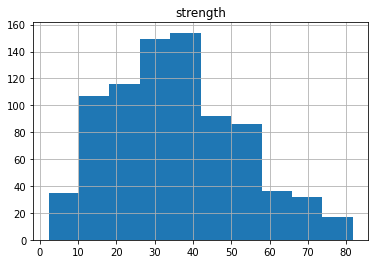

In [90]:
y_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3993D6DF0>]],
      dtype=object)

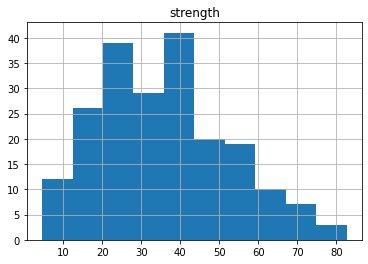

In [91]:
y_test.hist()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D39A3E06A0>]]


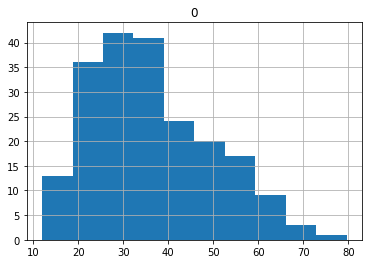

In [93]:
print(pd.DataFrame(y_pred).hist())

In [106]:
#Retaking samples
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [107]:
y_predr = regrr.predict(X_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D39A86B940>]],
      dtype=object)

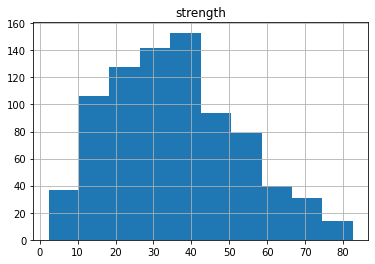

In [108]:
y_train.hist()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D39A77D220>]]


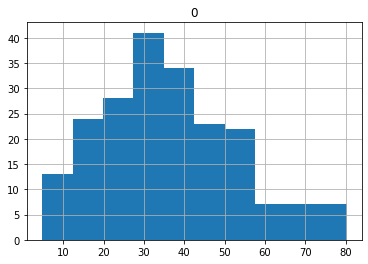

In [110]:
print(pd.DataFrame(y_predr).hist())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D39A783BE0>]],
      dtype=object)

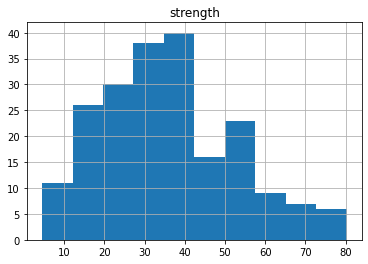

In [109]:
y_test.hist()

In [112]:
#Feature Scaling
from sklearn.preprocessing import Normalizer

cement_n = Normalizer().fit_transform(df)
cement_n = pd.DataFrame(cement_n)
print(cement_n)

             0         1         2         3         4         5         6  \
0     0.395564  0.000000  0.000000  0.118669  0.001831  0.761826  0.495187   
1     0.392536  0.000000  0.000000  0.117761  0.001817  0.766900  0.491397   
2     0.273422  0.117181  0.000000  0.187489  0.000000  0.766403  0.488458   
3     0.268004  0.114859  0.000000  0.183774  0.000000  0.751218  0.478781   
4     0.145460  0.096973  0.000000  0.140626  0.000000  0.716605  0.604618   
...        ...       ...       ...       ...       ...       ...       ...   
1025  0.227165  0.095337  0.074215  0.147608  0.007315  0.715110  0.631444   
1026  0.264131  0.000000  0.094766  0.160675  0.008526  0.670492  0.666803   
1027  0.121389  0.113950  0.088773  0.157519  0.004986  0.729475  0.637596   
1028  0.122216  0.143418  0.000000  0.134891  0.008680  0.760183  0.606011   
1029  0.216390  0.083355  0.064942  0.166378  0.007133  0.717016  0.631588   

             7         8  
0     0.020511  0.058595  
1     0.0

#### Now below we can't even expect 100% of accuracy with these 3/4/5 parameters instead we can get 60% or so accuracy based on
#### these parameters.

In [114]:
#Feature Selection 
from sklearn.feature_selection import RFE

logreg = linear_model.LinearRegression()
rfe = RFE(logreg, 3)# 3,4,5 based on client requirement
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)
# in-this case it tries to go with all the three combinations and gives us the best 3 combinations as a rank

[False False False  True  True False False  True]
[2 3 4 1 1 6 5 1]


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
